### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
%pip install plotly
%pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data['Bar'] = data['Bar'].str.replace('~', ' to ')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [24]:
tot = len(data)
tot_y = data['Y'].sum()
accepted = (tot_y/tot)
print(f"Accepted: {accepted:.2%}")

Accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

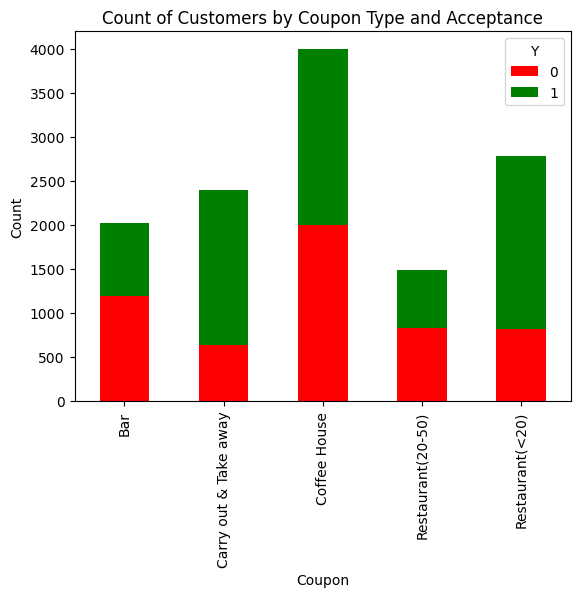

In [44]:
grouped_data = data.groupby(['coupon', 'Y']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Customers by Coupon Type and Acceptance')
plt.xticks(rotation=90)

6. Use a histogram to visualize the temperature column.

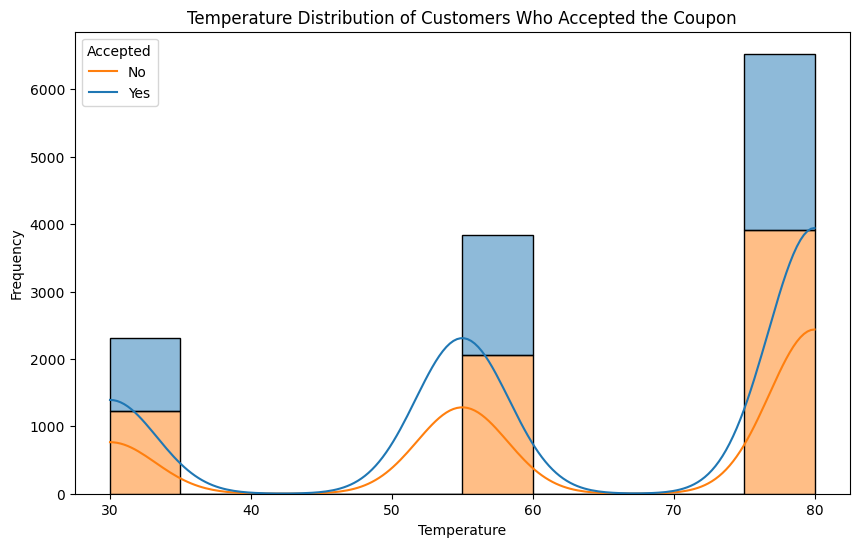

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', hue='Y', bins=10, kde=True, multiple="stack")
plt.title('Temperature Distribution of Customers Who Accepted the Coupon')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_coupons = data[data['coupon'] == 'Bar']
new_data = bar_coupons.copy()
new_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [23]:
tot_bar = len(new_data)
bar_y = new_data['Y'].sum()
bar_accepted = (bar_y/tot_bar)
bar_accepted
print(f"Bar Accepted: {bar_accepted:.2%}")

Bar Accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate: <3 times a month: 29.21%
Acceptance rate: >3 times a month: 73.47%


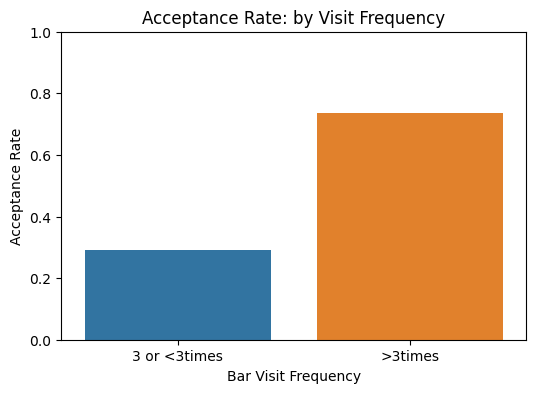

In [50]:
# data by bar visit
bar_less3 = new_data[new_data['Bar'].isin(['never', 'less1', '1~3'])]
bar_more3 = new_data[new_data['Bar'].isin(['4~8', 'gt8'])]

# acceptance rate calc
acceptance_less3 = bar_less3['Y'].mean()
acceptance_more3 = bar_more3['Y'].mean()

print(f"Acceptance rate: <3 times a month: {acceptance_less3:.2%}")
print(f"Acceptance rate: >3 times a month: {acceptance_more3:.2%}")

# visualization
acceptance_rates = pd.DataFrame({
    'Frequency': ['3 or <3times', '>3times'],
    'Acceptance Rate': [acceptance_less3, acceptance_more3]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Frequency', y='Acceptance Rate', hue='Frequency', data=acceptance_rates, dodge=False, legend=False)
plt.title('Acceptance Rate: by Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')
plt.ylim(0, 1)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:

# filter data based on condition in (4)
bar_more1_25 = new_data[(new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (new_data['age'] > '25')]
bar_all = new_data[~((new_data['Bar'].isin(['never', 'less1'])))]

# acceptance rate calc
acceptance_bar_more1_25 = bar_more1_25['Y'].mean()
acceptance_bar_all = bar_all['Y'].mean()

print(f"Acceptance rate:Drivers who go to a bar more than once a month and are over the age of 25: {acceptance_bar_more1_25:.2%}")
print(f"Acceptance rate:All drivers: {acceptance_bar_all:.2%}")


Acceptance rate:Drivers who go to a bar more than once a month and are over the age of 25: 67.65%
Acceptance rate:All drivers: 67.75%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [51]:
# filter data based on condition in (5)
bar_data_1 = new_data[
    (new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (new_data['passanger'] != 'Kid(s)') & 
    (~new_data['occupation'].isin(['Farming Fishing & Forestry']))
]

bar_data_2 = new_data[
    ~(
        (new_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
        (new_data['passanger'] != 'Kid(s)') & 
        (~new_data['occupation'].isin(['Farming Fishing & Forestry']))
    )
]

# acceptance calc
acceptance_bar_data_1 = bar_data_1['Y'].mean()
acceptance_bar_data_2 = bar_data_2['Y'].mean()

print(f"Acceptance rate: Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_bar_data_1:.2%}")
print(f"Acceptance rate: All other drivers: {acceptance_bar_data_2:.2%}")

Acceptance rate: Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 72.92%
Acceptance rate: All other drivers: 40.22%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 57.14%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 57.50%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 60.03%


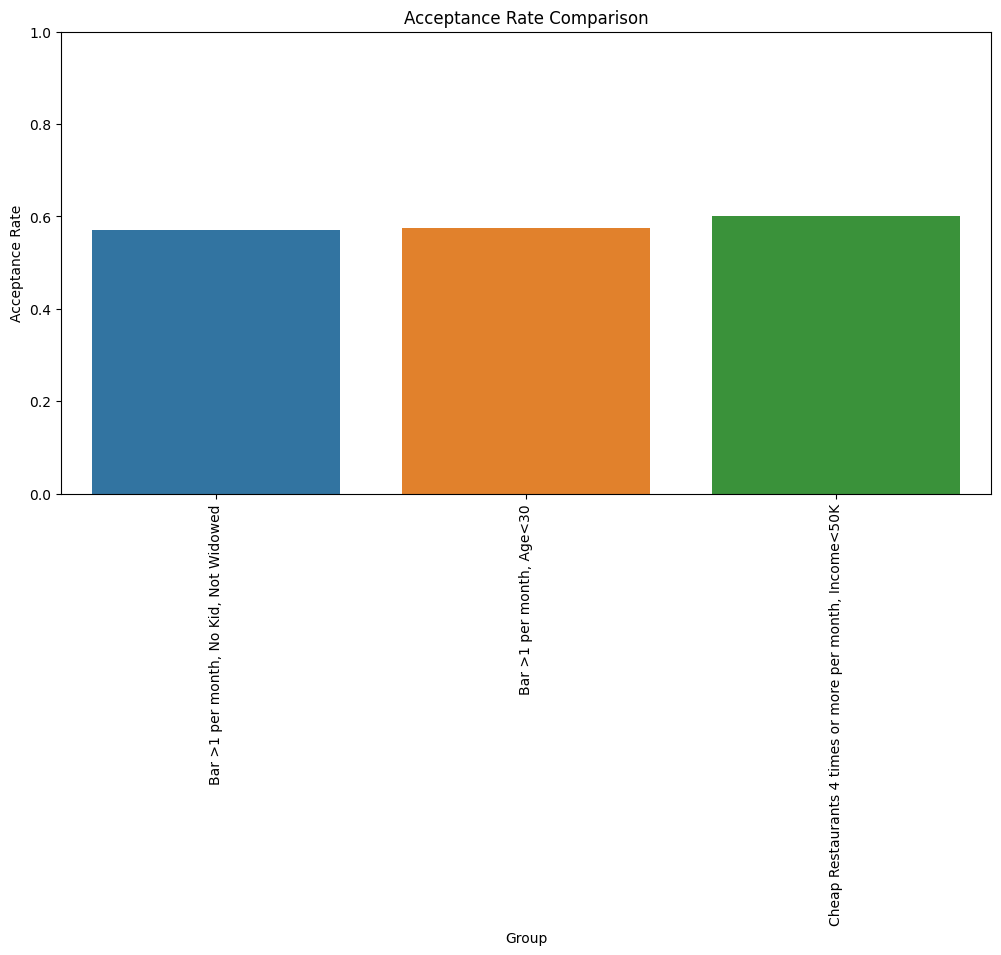

In [56]:
# Define conditions
filter1 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passanger'] != 'Kid(s)') & 
    (data['maritalStatus'] != 'Widowed')
)

filter2 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['age'] < '30')
)

filter3 = (
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (data['income'] < '$50000')
)

# Create subsets
subset_1 = data[filter1]
subset_2 = data[filter2]
subset_3 = data[filter3]

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()
acceptance_rate_subset_3 = subset_3['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_subset_2:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_subset_3:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Group': [
        'Bar >1 per month, No Kid, Not Widowed', 
        'Bar >1 per month, Age<30', 
        'Cheap Restaurants 4 times or more per month, Income<50K'
    ],
    'Acceptance Rate': [
        acceptance_rate_subset_1, 
        acceptance_rate_subset_2, 
        acceptance_rate_subset_3
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Acceptance Rate', hue='Group', data=acceptance_rates, dodge=False, legend=False)
plt.title('Acceptance Rate | Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1.In general, drivers who are travelling alone and have visited the bar atleast once a month have accepted bar coupons - 62% when compared to the drivers who has visited less than 1 or never.
2.Drivers who accepted the bar coupns are above 25yrs of age.
3.Male drivers while travelling along seem to accept the Bar coupon (51%) compared to female drivers (49%)
4.56% of the time young male drivers in the age group of 21 and below seem to accepting the bar coupon



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

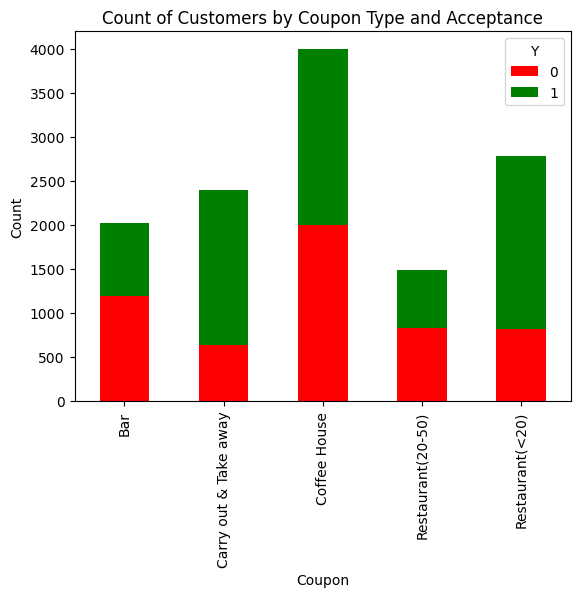

In [6]:
# coupon grouped by the 'Y' 
coupon_acceptance = data.groupby(['coupon', 'Y']).size().unstack()

# Plot the stacked bar plot
coupon_acceptance.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Customers by Coupon Type and Acceptance')
plt.xticks(rotation=90)

Since the acceptance take is hightest (73.55%) for "Carry out & Take away" coupons, i'm hoping to dig little deep to study and analyze the data.

In [10]:
# Filter for Carry out & Take away coupons
cotw_data = data[data['coupon'] == 'Carry out & Take away']
# Count the number of rows
row_count = cotw_data.shape[0]

# Print Restaurant(<20) coupon count
print(f"Number of rows where coupon is 'Carry out & Take away': {row_count}")

Number of rows where coupon is 'Carry out & Take away': 2393


Some of the attributes I considered while looking at the "Carry Out & Take Away" data are - 
1.Passenger
2.Destination
3.Age group

In [12]:
# Display value counts for destination, passenger, and age group
destination_counts = cotw_data['destination'].value_counts()
age_counts = cotw_data['age'].value_counts()
passenger_counts = cotw_data['passanger'].value_counts()

print("Counts by Destination:")
print(destination_counts)
print("\nCounts by Age:")
print(age_counts)
print("\nCounts by passengers:")
print(passenger_counts)

Counts by Destination:
No Urgent Place    978
Work               762
Home               653
Name: destination, dtype: int64

Counts by Age:
21         486
26         470
31         394
50plus     346
36         249
41         209
46         125
below21    114
Name: age, dtype: int64

Counts by passengers:
Alone        1405
Friend(s)     739
Kid(s)        152
Partner        97
Name: passanger, dtype: int64


In [14]:
# Calculate acceptance rates by destination
destination_acceptance = cotw_data.groupby('destination')['Y'].mean()

# Calculate acceptance rates based on time of day
age_acceptance = cotw_data.groupby('age')['Y'].mean()

# Calculate acceptance rates based on passengers
passenger_acceptance = cotw_data.groupby('passanger')['Y'].mean()

print("\nAcceptance rates by Destination:")
print(destination_acceptance)
print("\nAcceptance rates by Age:")
print(age_acceptance)
print("\nAcceptance rates by Passengers:")
print(passenger_acceptance)


Acceptance rates by Destination:
destination
Home               0.788668
No Urgent Place    0.762781
Work               0.654856
Name: Y, dtype: float64

Acceptance rates by Age:
age
21         0.740741
26         0.731915
31         0.705584
36         0.746988
41         0.717703
46         0.728000
50plus     0.774566
below21    0.728070
Name: Y, dtype: float64

Acceptance rates by Passengers:
passanger
Alone        0.727402
Friend(s)    0.757781
Kid(s)       0.703947
Partner      0.731959
Name: Y, dtype: float64


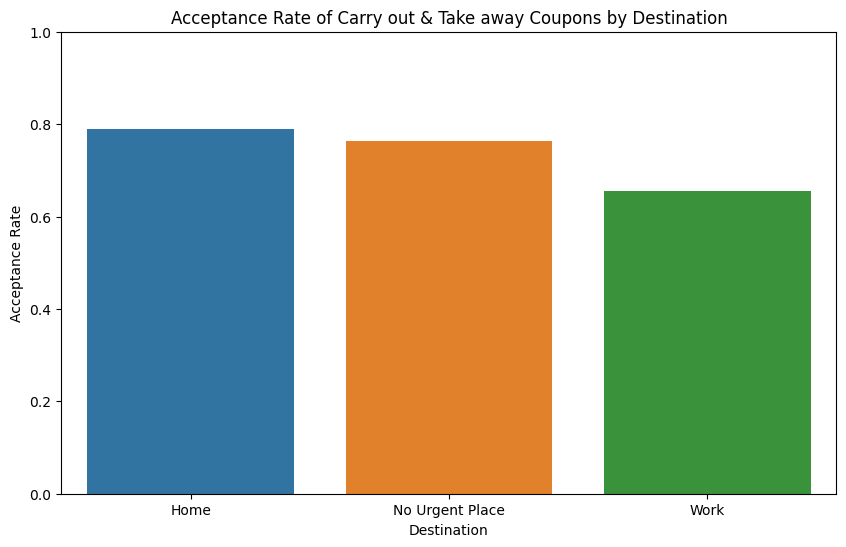

In [18]:
# Acceptance rates by destination
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_acceptance.index, y=destination_acceptance.values, hue=destination_acceptance.index, dodge=False, legend=False)
plt.title('Acceptance Rate of Carry out & Take away Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

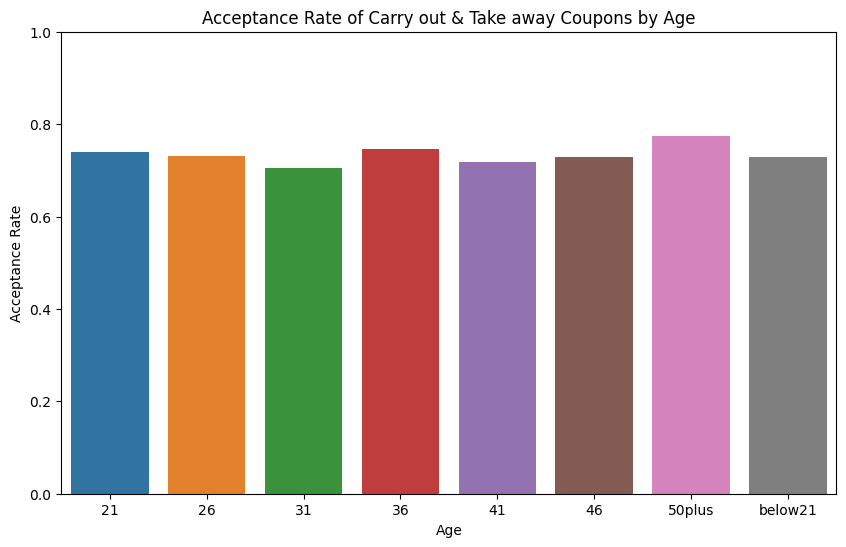

In [19]:
# Acceptance rates by age
plt.figure(figsize=(10, 6))
sns.barplot(x=age_acceptance.index, y=age_acceptance.values, hue=age_acceptance.index, dodge=False, legend=False)
plt.title('Acceptance Rate of Carry out & Take away Coupons by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

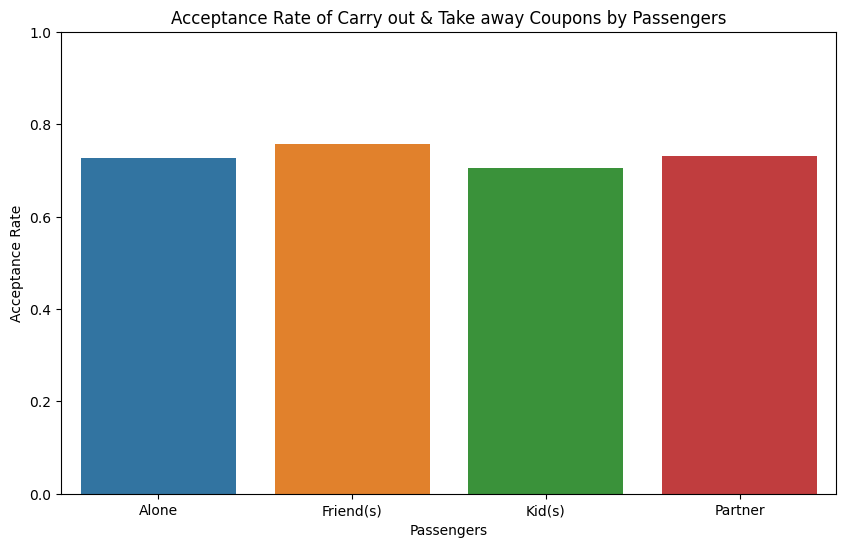

In [20]:
# Visualize acceptance rates by passengers
plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_acceptance.index, y=passenger_acceptance.values, hue=passenger_acceptance.index, dodge=False, legend=False)
plt.title('Acceptance Rate of Carry out & Take away Coupons by Passengers')
plt.xlabel('Passengers')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

Quick Summary

-Irrespective of the destination and age, drivers travlling wiht "Friends" seems to have the highest acceptance rate 75.78%.
-While looking at the "Passenger" data along with "Destination" , drivers travelling alone seems to be accepting coupons at 58%
-Though Gender does not influence much, drivers with the age group of 21 and below seems to be accepting coupons at the rate of 25%
